In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data.shape

(31962, 3)

In [4]:
data[data['label']==1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [5]:
data[data['label']==0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
lematizing=WordNetLemmatizer()

In [7]:
def remove_pattern(data,pattern):
    data=re.sub(pattern,' ',data)
    return data

In [8]:
data['tweet']=np.vectorize(remove_pattern)(data['tweet'],'@[\w]*')
data['tweet'].head()

0       when a father is dysfunctional and is so se...
1        thanks for #lyft credit i can't use cause ...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [9]:
data['tweet']=np.vectorize(remove_pattern)(data['tweet'],'[^a-zA-z#]')
data['tweet'].head()

0       when a father is dysfunctional and is so se...
1        thanks for #lyft credit i can t use cause ...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide  society now    #motivation
Name: tweet, dtype: object

In [10]:
tweet_list=[]

In [11]:
for i in range(len(data)):
    tweet=data['tweet'][i].lower().split()
    tweet=[lematizing.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
    tweet_list.append(' '.join(tweet))

In [12]:
for i in range(len(tweet_list)):
    tweet_list[i]=' '.join([word for word in tweet_list[i].split() if len(word)>3])

In [13]:
tweet_list[0:5]

['father dysfunctional selfish drag dysfunction #run',
 'thanks #lyft credit cause offer wheelchair #disapointed #getthanked',
 'bihday majesty',
 '#model love take time',
 'factsguide society #motivation']

In [14]:
all_words = ' '.join(tweet_list)

(-0.5, 799.5, 499.5, -0.5)

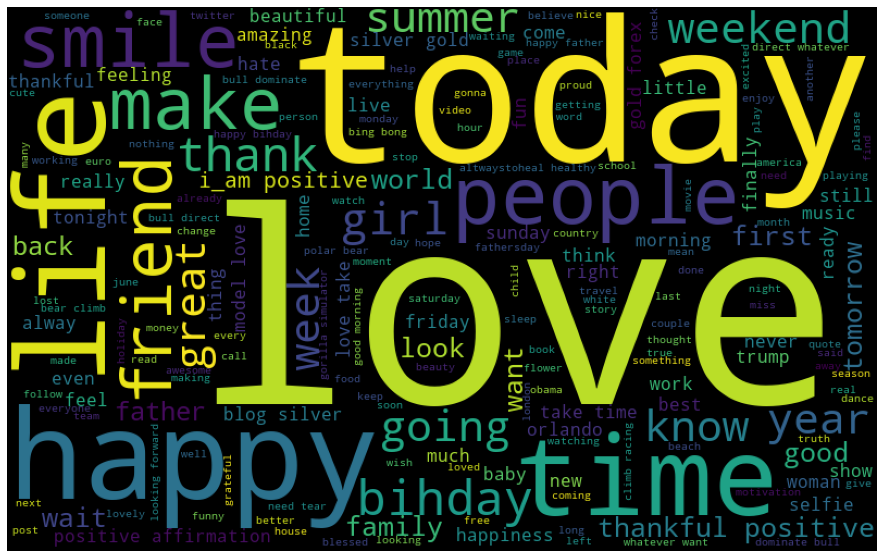

In [15]:
from wordcloud import WordCloud
wor_cloud=WordCloud(width=800,height=500,min_font_size=10)
plt.figure(figsize=(20,10))
plt.imshow(wor_cloud.generate(all_words))
plt.axis('off')

In [16]:
data['clean_tweet']=tweet_list
data.head()

,id,label,tweet,clean_tweet
0,1,0,when a father is dysfunctional and is so se...,father dysfunctional selfish drag dysfunction ...
1,2,0,thanks for #lyft credit i can t use cause ...,thanks #lyft credit cause offer wheelchair #di...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide society now #motivation,factsguide society #motivation


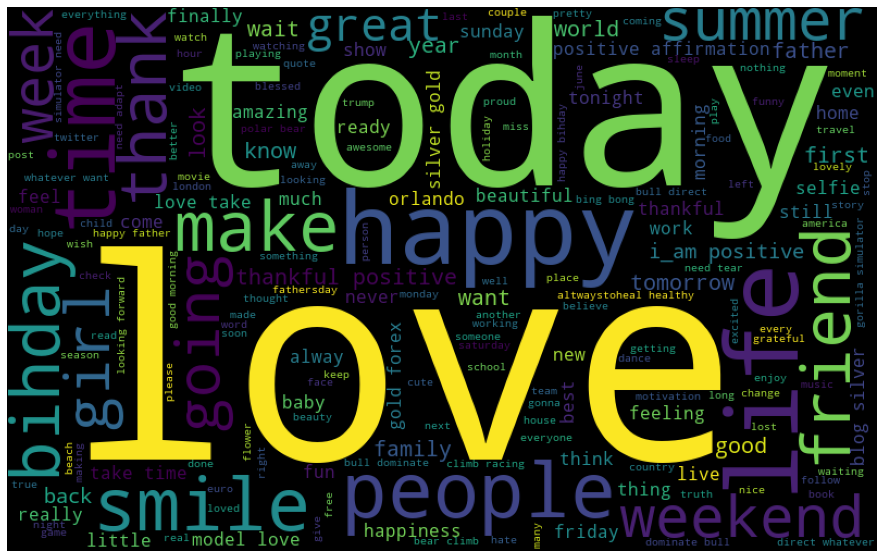

In [17]:
non_racist=' '.join([text for text in data[data['label']==0]['clean_tweet']])
plt.figure(figsize=(20,10))
plt.imshow(wor_cloud.generate(non_racist))
plt.axis('off')
plt.show()

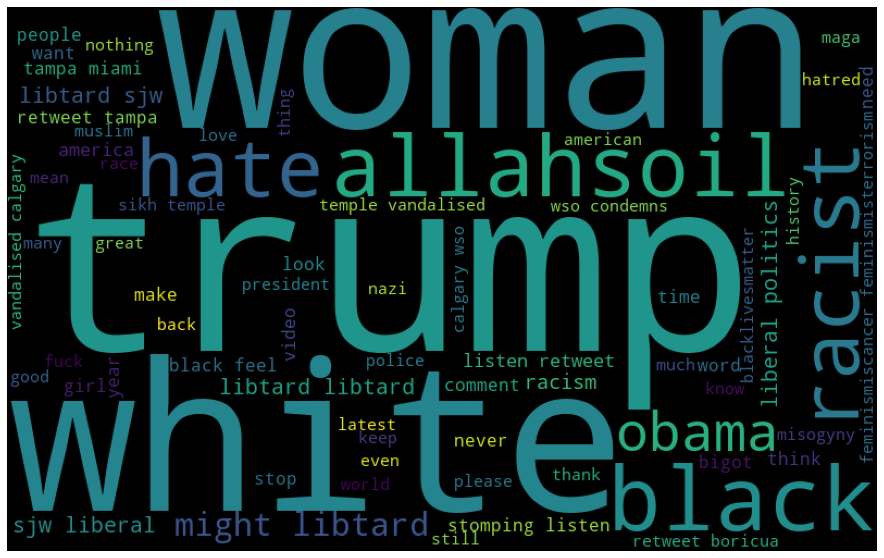

In [18]:
racist=' '.join([text for text in data[data['label']==1]['clean_tweet']])
plt.figure(figsize=(20,10))
plt.imshow(wor_cloud.generate(racist))
plt.axis('off')
plt.show()

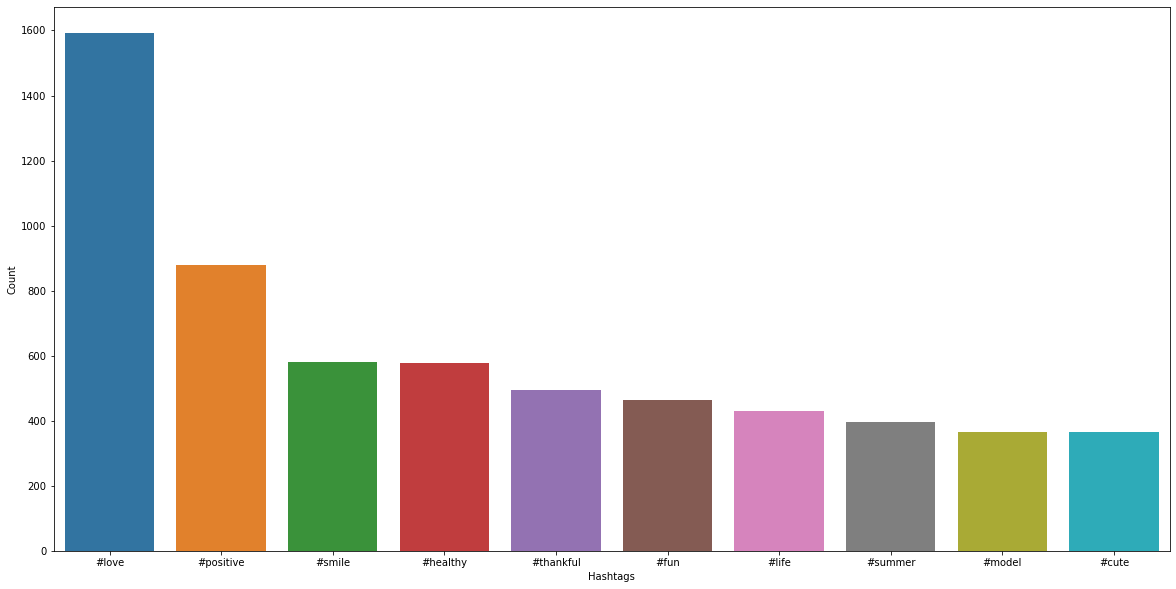

In [19]:
freq_dist_non_rasist=nltk.FreqDist(re.findall('#[\w]+',non_racist))
d=pd.DataFrame({'Hashtags':list(freq_dist_non_rasist.keys()),'Count':list(freq_dist_non_rasist.values())})
d=d.sort_values('Count',ascending=False)
d=d.iloc[0:10,:]
plt.figure(figsize=(20,10))
sns.barplot(data=d,x='Hashtags',y='Count')

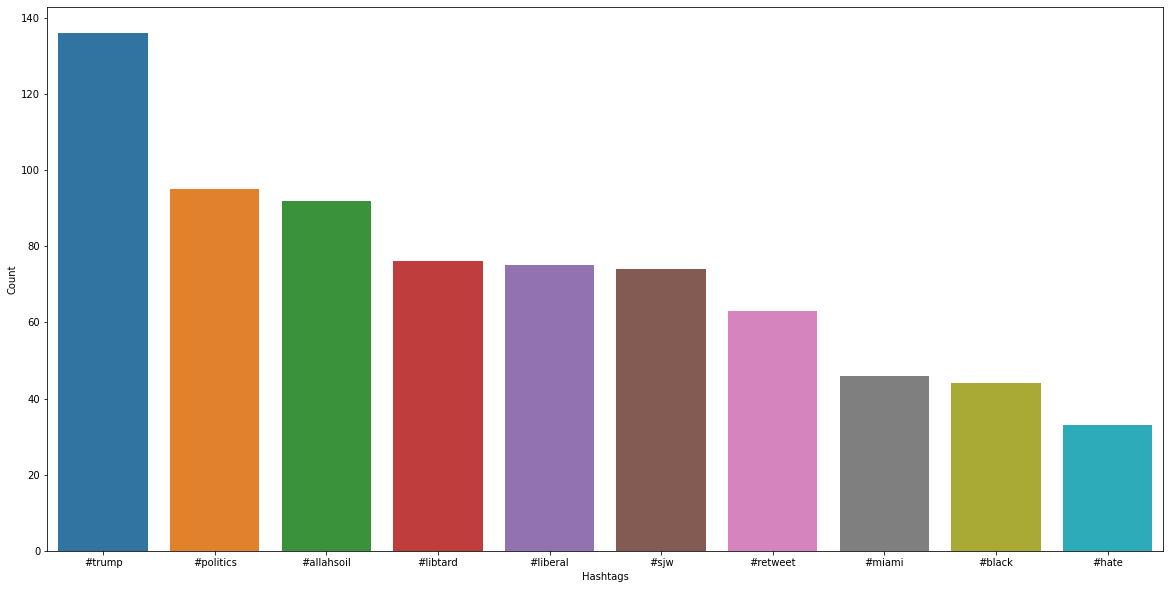

In [20]:
freq_dist_rasist=nltk.FreqDist(re.findall('#[\w]+',racist))
dr=pd.DataFrame({'Hashtags':list(freq_dist_rasist.keys()),'Count':list(freq_dist_rasist.values())})
dr=dr.sort_values('Count',ascending= False)
dr=dr.iloc[0:10,:]
plt.figure(figsize=(20,10))
sns.barplot(data=dr,x='Hashtags',y='Count')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(max_features=15000)
X=vect.fit_transform(tweet_list)
X=X.toarray()

In [15]:
X.shape

(31962, 15000)

In [16]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y=data['label'].values
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

(array([29720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

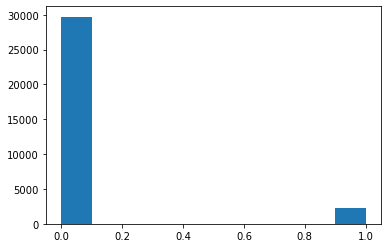

In [18]:
import matplotlib.pyplot as plt
plt.hist(y)

In [22]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.30,random_state = 30, stratify=y )

In [23]:
pd.Series(ytrain).value_counts()

0    20804
1     1569
dtype: int64

In [24]:
1569/20804

0.07541818880984426

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [30]:
from imblearn.pipeline import Pipeline
pipe = Pipeline([('smote',SMOTE()),('classifier',LogisticRegression())])

In [31]:
ratio = np.linspace(0.08,1,10)
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=pipe,param_grid={'smote__sampling_strategy':ratio},scoring='f1',cv=5,n_jobs=-1)
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'smote__sampling_strategy': array([0.08      , 0.18222222, 0.28444444, 0.38666667, 0.48888889,
       0.59111111, 0.69333333, 0.79555556, 0.89777778, 1.        ])},
             scoring='f1')

In [32]:
clf.best_score_

0.6243812209703385

In [33]:
clf.best_params_

{'smote__sampling_strategy': 0.28444444444444444}

In [26]:
sm=SMOTE(sampling_strategy=0.5)
Xtrain,ytrain = sm.fit_resample(Xtrain,ytrain)

(array([20804.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10402.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

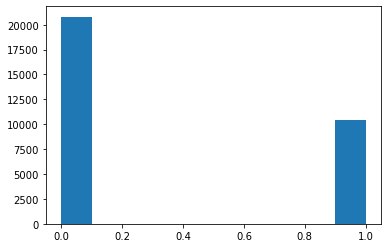

In [27]:
plt.hist(ytrain)

In [29]:
log=LogisticRegression(penalty='none',max_iter=1000)
log.fit(Xtrain,ytrain)

LogisticRegression(max_iter=1000, penalty='none')

In [41]:
y1_pred=log.predict(Xtest)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8916
           1       0.62      0.71      0.66       673

    accuracy                           0.95      9589
   macro avg       0.80      0.84      0.82      9589
weighted avg       0.95      0.95      0.95      9589

